<a href="https://colab.research.google.com/github/inixrust/datasets/blob/main/LinearRegressionForPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!wget --no-check-certificate https://raw.githubusercontent.com/inixrust/datasets/main/housing.csv

--2024-09-03 06:09:51--  https://raw.githubusercontent.com/inixrust/datasets/main/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1.36M  --.-KB/s    in 0.08s   

2024-09-03 06:09:51 (16.4 MB/s) - ‘housing.csv’ saved [1423529/1423529]



In [6]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
housing_data = pd.read_csv('/content/housing.csv')

In [8]:
housing_data.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
18099,-122.04,37.32,27.0,2826.0,451.0,1259.0,439.0,5.7528,431400.0,<1H OCEAN
7854,-118.16,33.89,46.0,940.0,219.0,599.0,214.0,3.2813,190900.0,<1H OCEAN
9643,-120.85,37.06,31.0,2609.0,645.0,1796.0,629.0,1.5479,82000.0,INLAND
9629,-121.00,37.25,31.0,1923.0,341.0,806.0,349.0,3.1738,97600.0,INLAND
8211,-118.18,33.79,27.0,1580.0,510.0,1896.0,448.0,2.0186,130000.0,NEAR OCEAN


In [9]:
housing_data = housing_data.dropna()

In [10]:
housing_data.shape

(20433, 10)

In [11]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [12]:
housing_data.loc[housing_data['median_house_value'] == 500001].count()

,0
longitude,958
latitude,958
housing_median_age,958
total_rooms,958
total_bedrooms,958
population,958
households,958
median_income,958
median_house_value,958
ocean_proximity,958


In [13]:
housing_data = housing_data.drop(housing_data.loc[housing_data['median_house_value'] == 500001].index)

In [14]:
housing_data.shape

(19475, 10)

In [15]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [16]:
housing_data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [17]:
housing_data = pd.get_dummies(housing_data, columns=['ocean_proximity'])

In [18]:
housing_data.shape

(19475, 14)

In [19]:
housing_data.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
11209,-117.90,33.82,32.0,1187.0,302.0,1003.0,275.0,2.4931,166900.0,True,False,False,False,False
19185,-122.56,38.41,20.0,1151.0,211.0,478.0,183.0,5.9300,384600.0,True,False,False,False,False
20101,-120.25,37.93,13.0,493.0,76.0,196.0,68.0,3.3750,134100.0,False,True,False,False,False
1213,-120.54,38.07,37.0,736.0,148.0,339.0,140.0,2.2875,79900.0,False,True,False,False,False
3666,-118.38,34.24,38.0,125.0,42.0,63.0,29.0,1.3594,158300.0,True,False,False,False,False


In [20]:
X = housing_data.drop('median_house_value', axis=1)
Y = housing_data['median_house_value']

In [21]:
X.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [22]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [23]:
x_train.shape, x_test.shape

((15580, 13), (3895, 13))

In [24]:
y_train.shape, y_test.shape

((15580,), (3895,))

### Train a linear model for price prediction

In [27]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression(fit_intercept=False).fit(x_train, y_train)

In [28]:
print("Training_score : " , linear_model.score(x_train, y_train))

Training_score :  0.6171379251520355


In [29]:
predictors = x_train.columns

predictors

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [30]:
coef = pd.Series(linear_model.coef_, predictors).sort_values()

print(coef)

ocean_proximity_INLAND       -2.175237e+06
ocean_proximity_NEAR BAY     -2.143675e+06
ocean_proximity_<1H OCEAN    -2.138029e+06
ocean_proximity_NEAR OCEAN   -2.132692e+06
ocean_proximity_ISLAND       -2.000522e+06
longitude                    -2.495481e+04
latitude                     -2.300555e+04
population                   -2.943648e+01
total_rooms                  -8.346951e+00
households                    4.266352e+01
total_bedrooms                9.619847e+01
housing_median_age            9.431066e+02
median_income                 3.903085e+04
dtype: float64


In [31]:
y_pred = linear_model.predict(x_test)

In [32]:
df_pred_actual = pd.DataFrame({'predicted': y_pred, 'actual': y_test})

df_pred_actual.head(10)

,predicted,actual
12636,73433.281890,68000.0
4444,133887.997193,145800.0
304,186260.128116,97300.0
8447,202839.302387,256300.0
14567,177117.115990,176000.0
11052,233972.062973,211000.0
9079,181583.543300,163600.0
13704,83375.252629,78300.0
19779,74636.034637,53500.0
13632,101542.717049,90500.0


In [33]:
from sklearn.metrics import r2_score

print("Testing_score : ", r2_score(y_test, y_pred))

Testing_score :  0.5952345736294805


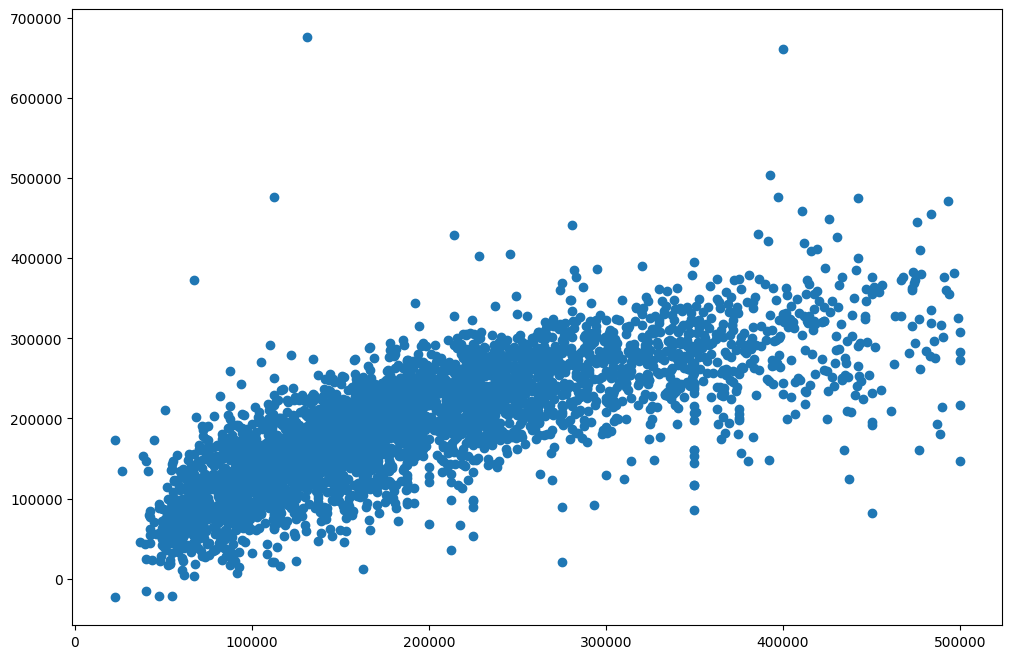

In [34]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(y_test, y_pred)
plt.show()

In [35]:
df_pred_actual_sample = df_pred_actual.sample(100)
df_pred_actual_sample = df_pred_actual_sample.reset_index()

In [36]:
df_pred_actual_sample.head()

,index,predicted,actual
0,15265,199729.316859,252700.0
1,18599,231237.641974,206900.0
2,17830,319902.479821,265300.0
3,18252,287656.933419,354500.0
4,5446,247648.711530,324300.0


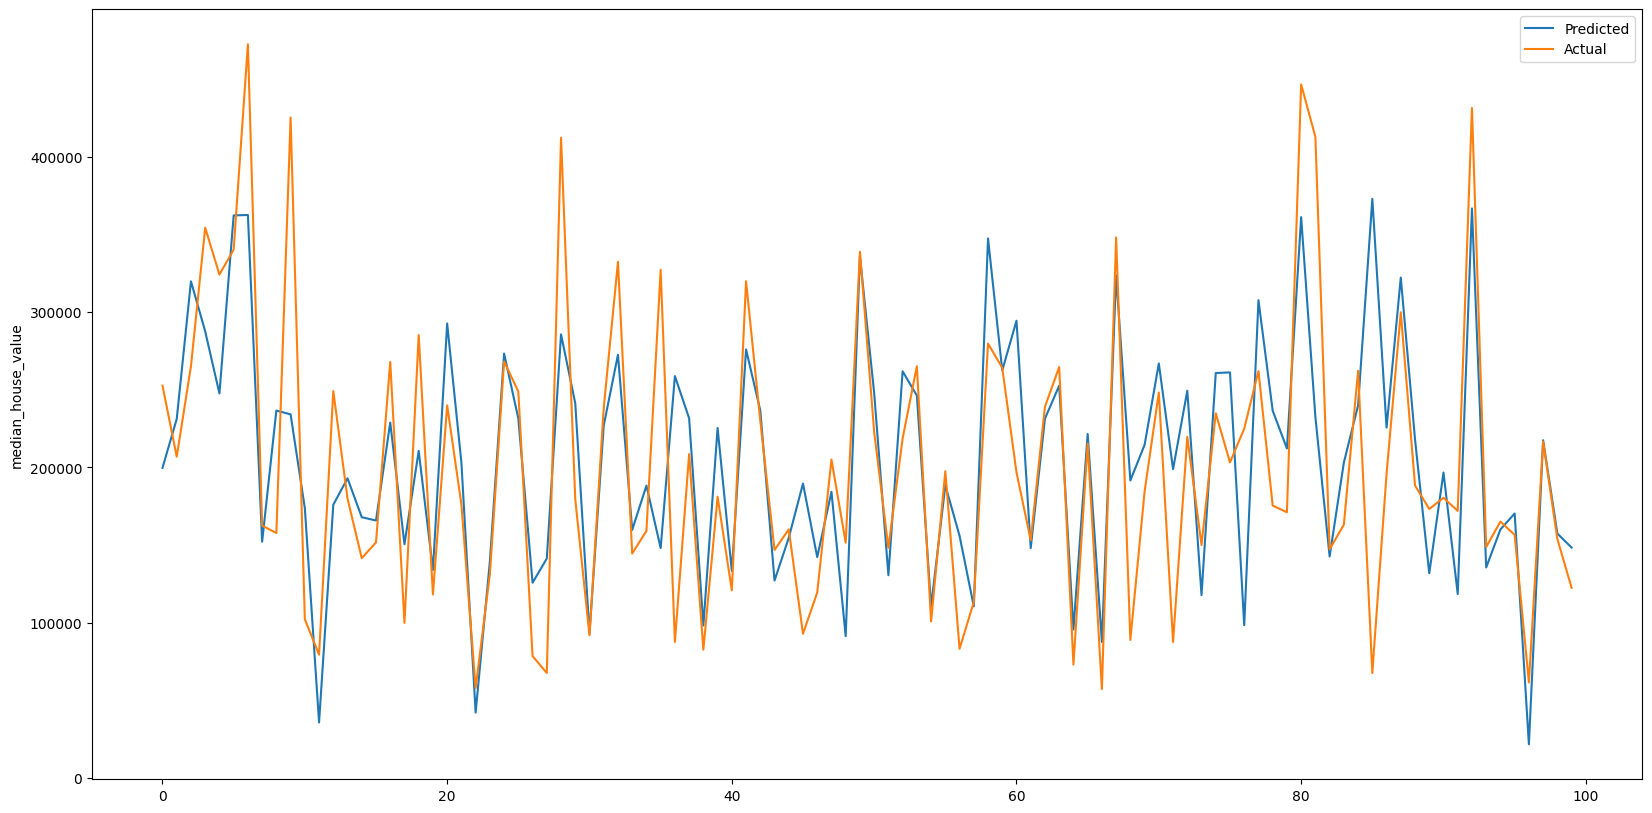

In [37]:
plt.figure(figsize = (20,10))

plt.plot(df_pred_actual_sample['predicted'], label='Predicted')
plt.plot(df_pred_actual_sample['actual'], label='Actual')

plt.ylabel('median_house_value')

plt.legend()
plt.show()